In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

# **Read Processed_Dataset**

To download csv file

https://drive.google.com/file/d/1-XvUBfFhfRHTEf3Au2EDjdJ9OPGADJ79/view?usp=share_link

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interview Assessment/Processed_BigDataset.csv')

In [ ]:
dataset

,time_stamp,Function,Time
0,2022-07-03 15:50:12.096,get_newest_articles_api.py get_keywords,4.328657
1,2022-07-03 15:50:12.295,get_newest_articles_api.py save_to_db,0.178776
2,2022-07-03 15:50:12.302,get_newest_articles_api.py db_check_not_empty,0.003546
3,2022-07-03 15:50:12.309,get_newest_articles_api.py db_get_newest_entry,0.003825
4,2022-07-03 15:50:12.332,get_newest_articles_api.py get,0.019008
...,...,...,...
5207141,2022-07-28 13:14:59.520,main.py (API) recommendation,0.399632
5207142,2022-07-28 13:14:59.543,main.py (API) main,0.589446
5207143,2022-07-28 13:14:59.551,main.py (API) save_to_db,0.002028
5207144,2022-07-28 13:15:01.834,main.py (API) collection_exists,0.001927


In [ ]:
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5207146 entries, 0 to 5207145
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time_stamp  datetime64[ns]
 1   Function    object        
 2   Time        float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 119.2+ MB


In [ ]:
num = input("Enter number of rows:")

Enter number of rows:5200000


In [ ]:
new_dataset = pd.DataFrame()
new_dataset = dataset.head(int(num))
# del [[dataset]]
# gc.collect()
# dataset=pd.DataFrame()
new_dataset

,time_stamp,Function,Time
0,2022-07-03 15:50:12.096,get_newest_articles_api.py get_keywords,4.328657
1,2022-07-03 15:50:12.295,get_newest_articles_api.py save_to_db,0.178776
2,2022-07-03 15:50:12.302,get_newest_articles_api.py db_check_not_empty,0.003546
3,2022-07-03 15:50:12.309,get_newest_articles_api.py db_get_newest_entry,0.003825
4,2022-07-03 15:50:12.332,get_newest_articles_api.py get,0.019008
...,...,...,...
5199995,2022-07-28 12:34:24.786,main.py (API) ai_cosin_sim,0.342996
5199996,2022-07-28 12:34:24.791,main.py (API) save_to_db,0.002443
5199997,2022-07-28 12:34:24.793,main.py (API) recommendation,0.388533
5199998,2022-07-28 12:34:24.818,main.py (API) main,0.573002


In [ ]:
new_dataset['Time'].max()

1820.7911133766167

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200000 entries, 0 to 5199999
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time_stamp  datetime64[ns]
 1   Function    object        
 2   Time        float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 119.0+ MB


In [ ]:
new_dataset.set_index('time_stamp',inplace=True)

Get unique function from new_dataset

In [ ]:
new_dataset.Function.nunique() #Number of unique
unique_function = new_dataset.Function.unique() #unique values in an array

# **Visualization**

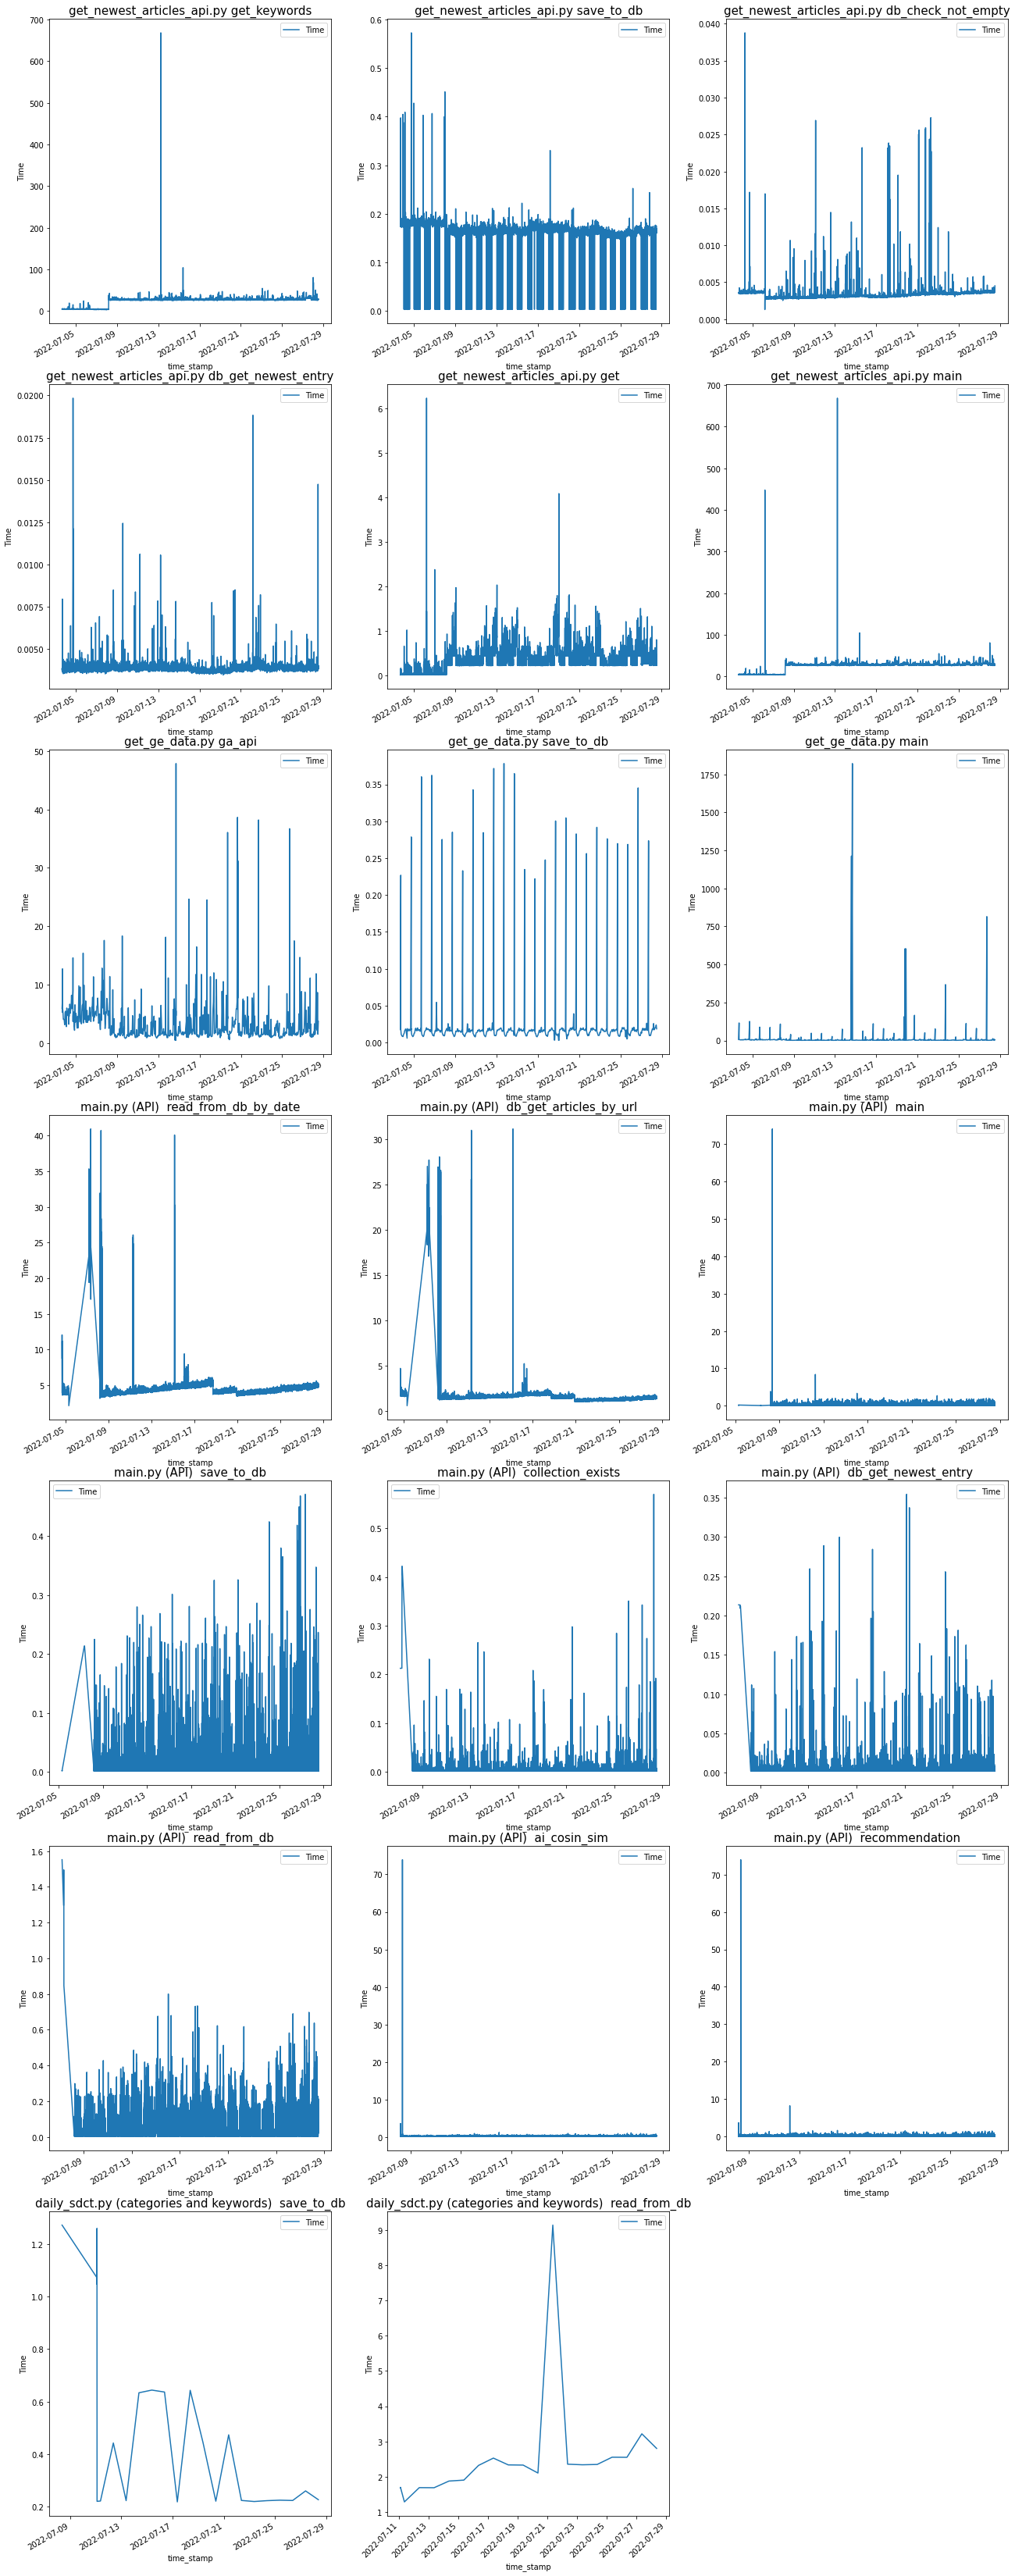

In [ ]:
# it takes around 40 seconds to visualiz 5.2 million records
%timeit
length_functions = len(unique_function)
if length_functions%2 == 0:
  figure_col_size = 10*(length_functions//2)
  plt.figure(figsize=(22, figure_col_size+80))
elif length_functions%2 != 0:
  figure_col_size = 10*(length_functions//2)
  plt.figure(figsize=(22, figure_col_size+90))

ncols = 3
# calculate number of rows
nrows = length_functions-1

for n, each_function in enumerate(unique_function):
  # print(n)
  # print()
  # print(each_function)
  # add a new subplot iteratively
  ax = plt.subplot(nrows, ncols, n+1)
  # filter df and plot ticker on the new subplot axis
  new_dataset[new_dataset["Function"] == each_function].plot(ax=ax)
    # chart formatting
  ax.set_title(each_function, fontsize=15)
  ax.set_xlabel('time_stamp', fontsize=10)
  ax.set_ylabel('Time', fontsize=10)

#plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Interview Assessment/5200000_records_image.svg')   # code gives me an error here

plt.show()
plt.clf()    # normally I use these lines to release the memory
plt.close()
#plt.show()
